# Table models:
This notebook gives some examples to illustrate ou to use the `tablemodel` module of the `cascapy`package.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cascapy.constants import *
from cascapy.tablemodel import *
from cascapy.intrinsic import GRB190114C
from h5py import File as h5file

## Time bins
Times bins are required in many situations, including the definition of a table model.
Times bins can be contiguous or not. In particular, as observations can not be performed during daytime, long observations require non-contiguous time bins.
### Defining time bins
The `time_bins()` function builds a list a time bins based on some observational constraints :
- pointing time: is the minimal time required to point the telescope to the source after de GRB trigger.
- night_start: is the time after the GRB trigger when the observable night starts (can be negative)
- n_nights: is the total number of nights (or days) for follow-up
- night_duration is the duration during which a given source can be observed at night
- nbins: the number of time bins

In the example below, it can be observed that the defined time bins are not contiguous.

In [2]:
tb = time_bins(pointing_time=60,night_start=1*hour,n_nights=4,night_duration=5*hour,nbins=7)

In [3]:
print(tb)

[[  3600.           5674.06675273]
 [  5674.06675273   8943.06486513]
 [  8943.06486513  14095.42972743]
 [ 14095.42972743  21600.        ]
 [ 90000.         108000.        ]
 [176400.         194400.        ]
 [262800.         280800.        ]]


### Visualizing time bins
The `view_tbins`function has the same arguments, and make a plots of the times bins starting at the GRB trigger.

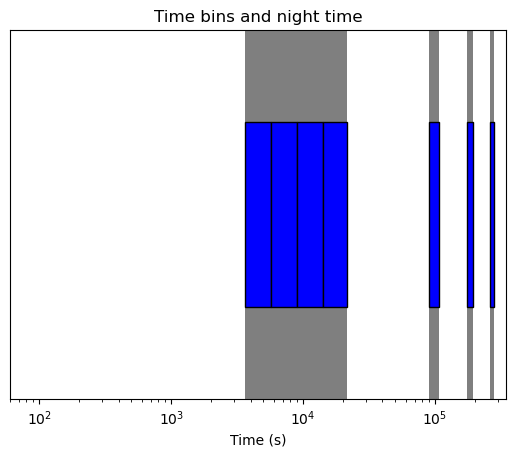

In [4]:
view_tbins(pointing_time=60,night_start=1*hour,n_nights=4,night_duration=5*hour,nbins=7)

## Making table models
Tables models are built with the `TableModel()` class.

1a) The first step is to instantiate the tablemodel class by defining some preliminary properties of the table. The following lines build the python class but does not create aby file yet.

In [3]:
# Path where the results of Monte Carlo simulations are. the test simulation file is in examples/data/
path = './data/'

# Some comments to explain why and how this table is made.
com = ['This table is a test table','It is just for fun']

# Tile and energy bins
tbins = np.logspace(np.log10(60),np.log10(5*day),16)
ebins = np.logspace(np.log10(1*GeV),np.log10(10*TeV),21)

# Instantiatiation
TB = TableModel(file='./data/newtable.h5',mode='w',simupath=path,chatter=1,comments=com)

1b) Pursue setup by adding more information. Note that the following informations could also have been passed as instantiation arguments at the previous step.

In [4]:
TB.tbins = tbins
TB.ebins = ebins
TB.smodel  = GRB190114C
TB.igmf    = {'logB':-17,'lambdaB':6}

1c) Complete setup by setting the properties of the varying parameters. Again, this information could also have been passed as instantiation arguments at the previous step.

In [5]:
gamma = np.linspace(1.2,3,15)
alpha = np.linspace(1,2,10)
TB.vparams = {'gamma':gamma,'alpha':alpha}

2) Create file and store some general information in it (bins, parameters etc)

In [6]:
TB.init_table()

3) Compute data and store it to file. Multiprocessing is handled. In the folowing lines, the total bunch of different parameter sets is seperated into `chunks_factor` x `nproc` = 4x7 = 28 packets (chunks) which are processed buy `nproc=7` tasks (e.g. processors). Each task recieves a packet. As soons as this packet is complete, it receives a new one, and so on.

This step can take a while.

In [7]:
TB.fill_table(chunkfactor=4,nproc=7)

Computing 150 parameter sets:
   - separated into 15 chunks
   - processed by 7 seperated tasks
PID 81416 processing chunk #000...
PID 81421 processing chunk #005...
PID 81417 processing chunk #001...
PID 81422 processing chunk #006...
PID 81419 processing chunk #003...
PID 81418 processing chunk #002...
PID 81420 processing chunk #004...
   Reading: ./data/z042/particles_z0425_B1700_L600.csc
PID 81422: chunk #006 completed.
PID 81422 processing chunk #007...
   Reading: ./data/z042/particles_z0425_B1700_L600.csc
PID 81416: chunk #000 completed.
PID 81416 processing chunk #008...
   Reading: ./data/z042/particles_z0425_B1700_L600.csc
PID 81417: chunk #001 completed.
PID 81417 processing chunk #009...
   Reading: ./data/z042/particles_z0425_B1700_L600.csc
PID 81419: chunk #003 completed.
   Reading: ./data/z042/particles_z0425_B1700_L600.csc
PID 81418: chunk #002 completed.
PID 81419 processing chunk #010...
PID 81418 processing chunk #011...
   Reading: ./data/z042/particles_z0425_B170

## Reading a table model from file
Reading a file is done by means of the `r` mode when the class is instantiated. In such case, any additional passed argument is ignored.

In [10]:
TB = TableModel(file='./data/table.h5',mode='r')
TB.info()

TIME
   tmin (s)  = 1.00e+02
   tmax (s)  = 1.00e+05
   ntbins    = 15
ENERGY
   emin (GeV) = 1.00e-01
   emax (GeV) = 1.00e+04
   nebins     = 30
IGMF
   {'logB': -17, 'lambdaB': 6}
SOURCE MODEL
   Time    model: {'Ttype': 'PL', 'alpha': 1.2, 'tmin': 6, 'tmax': 1e+20}
   Energy  model: {'Etype': 'PL', 'z': 0.4245, 'gamma': 1.8, 'emin': 1.602176634e-05, 'emax': 16.02176634, 'epiv': 1.6021766339999999}
   Angular model: {'Atype': 'Iso', 'th_obs': 0.0}
   normalization: 3.067289306703261e-05
FIXED PARAMETERS
   {'norm': 3.067289306703261e-05, 'Ttype': 'PL', 'tmin': 6, 'tmax': 1e+20, 'Etype': 'PL', 'z': 0.4245, 'emin': 1.602176634e-05, 'emax': 16.02176634, 'epiv': 1.6021766339999999, 'Atype': 'Iso', 'th_obs': 0.0, 'logB': -17, 'lambdaB': 6}
VARIABLE PARAMETERS
   gamma: [2.        2.1111112 2.2222223 2.3333333 2.4444444 2.5555556 2.6666667
 2.7777777 2.8888888 3.       ]
   alpha: [1.        1.1111112 1.2222222 1.3333334 1.4444444 1.5555556 1.6666666
 1.7777778 1.8888888 2.       ]
ADDITI

In the previous case, the file is opened, data is copied to numpy arrays ans the file is closed automatically.

In [11]:
print(type(TB.data))

<class 'numpy.ndarray'>


This means that the entire file content must be loaded to RAM. For large files, only references to the data can be used instead. This implies to open the file before instantiating the class, and closing is manually afterwards. In that case, only the relevant part of the data are then read when needed...

In [12]:
f = h5file('./data/table.h5', 'r')
TB = TableModel(file=f,mode='r')
print(type(TB.data))
f.close()

<class 'h5py._hl.dataset.Dataset'>


## Visualizing the table data
Data of a table model can be visualize with the `spectra()` class method. Although it is allowed to load the entire file to RAM, it is a good example where it can be more efficient to open the file before instantiation, hence using only references to the data.

WARNING: In such a notebook, the interactive widget is produced outside of the cell. It means that the file must not be close in the same cell otherwise it is closed before any change for instance of the sliders, which produced an error.

<IPython.core.display.Javascript object>


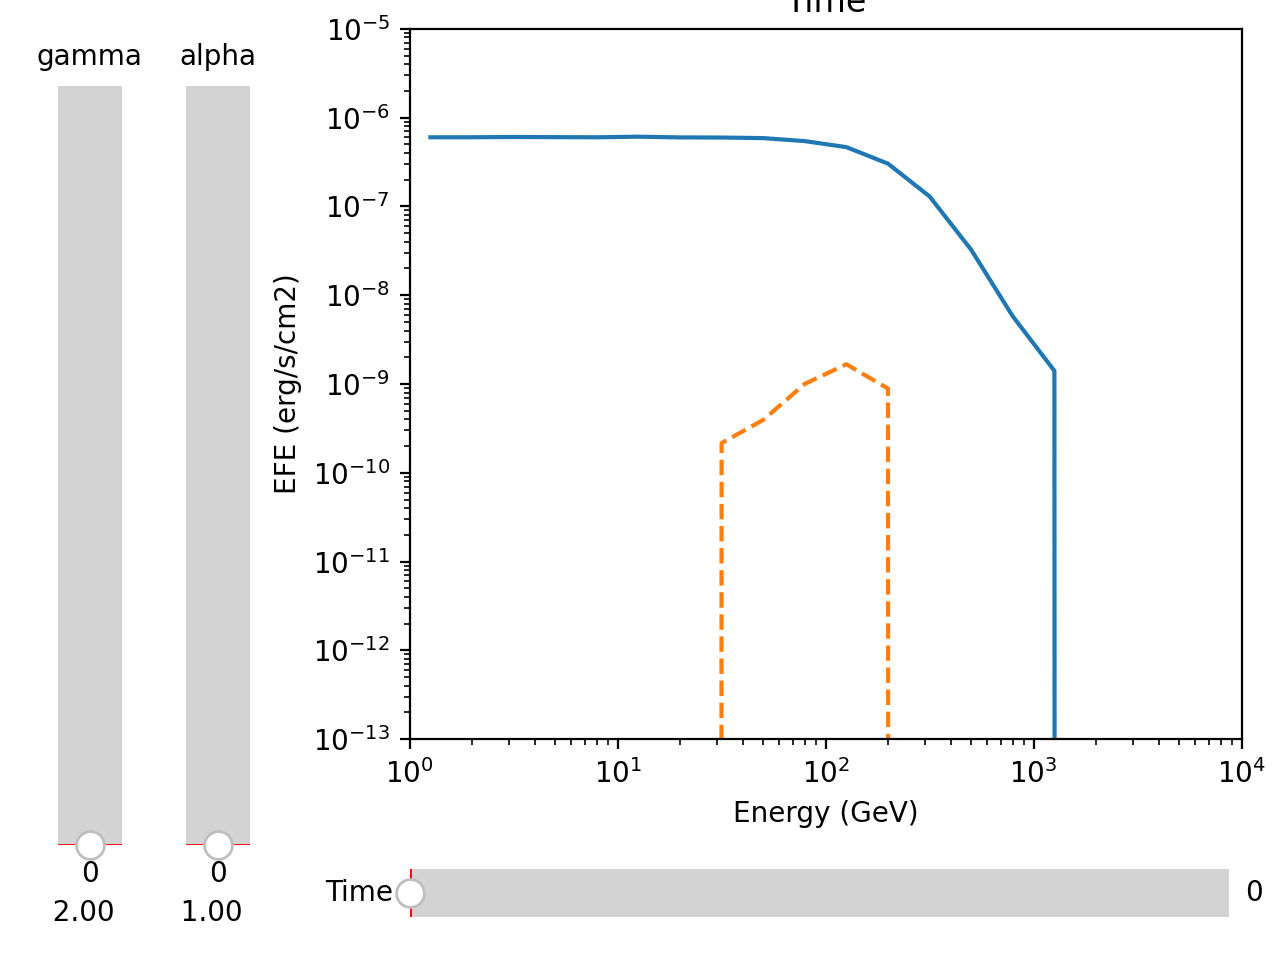

In [13]:
%matplotlib notebook
f = h5file('./data/table.h5', 'r')
TB = TableModel(file=f,mode='r')
TB.spectra()

In [15]:
# Hdf5 files can only be open and read once at a time => don't forget to close the file before any other use
f.close()

It is also possible to check all lightcurves of the table model with the `lightcurve()`method.

<IPython.core.display.Javascript object>


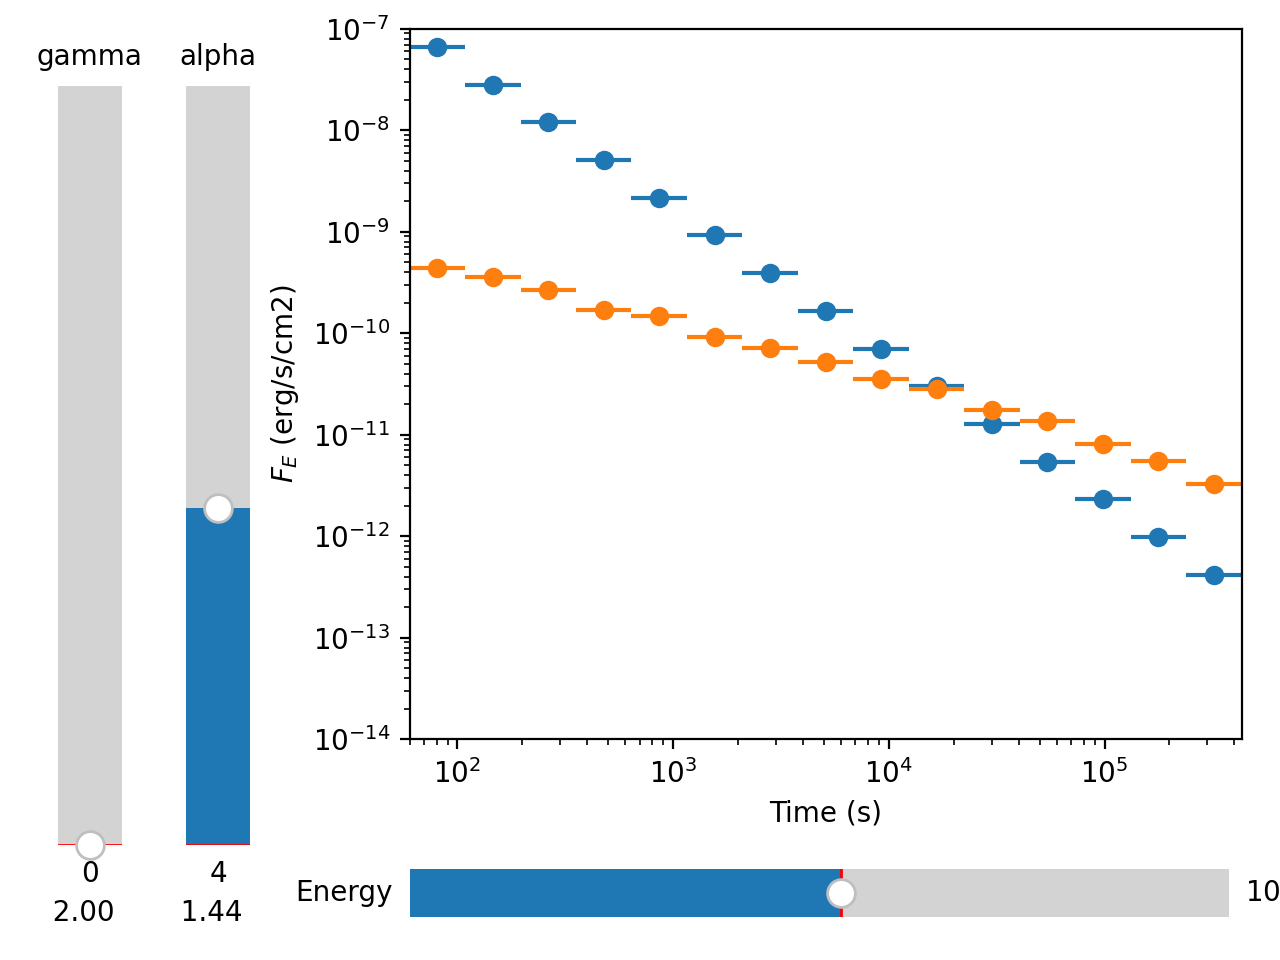

In [16]:
%matplotlib notebook
f = h5file('./data/table.h5', 'r')
TB = TableModel(file=f,mode='r')
TB.lightcurves()

In [17]:
# Hdf5 files can only be open and read once at a time => don't forget to close the file before any other use
f.close()